<h1>Импорт библиотек

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [37]:
import numpy as np

def sum_prod(X, V):
    '''
    X - список матриц (p, n, n)
    V - список векторов (p, n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Начальная сумма, инициализированная с типом float
    result = np.zeros_like(V[0], dtype=float)
    
    # Проходим по всем матрицам и вектору
    for x, v in zip(X, V):
        result += x @ v  # Произведение матрицы на вектор
    
    return result

# Функция для проверки тестов
def run_tests():
    # Тест 1: Базовый случай
    X1 = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V1 = [np.array([[1], [1]]), np.array([[1], [1]])]
    result1 = sum_prod(X1, V1)
    expected1 = np.array([[1 + 2 + 5 + 6], [3 + 4 + 7 + 8]])
    assert np.array_equal(result1, expected1), f"Test 1 Failed: {result1} != {expected1}"
    print("Test 1 Passed")

    # Тест 2: Единичные матрицы
    X2 = [np.eye(2), np.eye(2)]
    V2 = [np.array([[1], [2]]), np.array([[3], [4]])]
    result2 = sum_prod(X2, V2)
    expected2 = np.array([[1 + 3], [2 + 4]])
    assert np.array_equal(result2, expected2), f"Test 2 Failed: {result2} != {expected2}"
    print("Test 2 Passed")

    # Тест 3: Нулевые матрицы и векторы
    X3 = [np.zeros((2, 2)), np.zeros((2, 2))]
    V3 = [np.zeros((2, 1)), np.zeros((2, 1))]
    result3 = sum_prod(X3, V3)
    expected3 = np.zeros((2, 1))
    assert np.array_equal(result3, expected3), f"Test 3 Failed: {result3} != {expected3}"
    print("Test 3 Passed")

    # Тест 4: Разные размеры
    X4 = [np.array([[1, 0], [0, 1]])]
    V4 = [np.array([[5], [10]])]
    result4 = sum_prod(X4, V4)
    expected4 = np.array([[5], [10]])
    assert np.array_equal(result4, expected4), f"Test 4 Failed: {result4} != {expected4}"
    print("Test 4 Passed")

    # Тест 5: Большой случай
    n = 100
    X5 = [np.random.rand(n, n) for _ in range(10)]
    V5 = [np.random.rand(n, 1) for _ in range(10)]
    result5 = sum_prod(X5, V5)
    expected5 = np.zeros((n, 1))
    for x, v in zip(X5, V5):
        expected5 += x @ v
    assert np.array_equal(result5, expected5), "Test 5 Failed"
    print("Test 5 Passed")

# Запуск тестов
run_tests()


Test 1 Passed
Test 2 Passed
Test 3 Passed
Test 4 Passed
Test 5 Passed


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [40]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)
def run_tests():
    # Тест 1: Базовый случай
    M1 = np.array([[0.2, 0.6], [0.3, 0.8]])
    result1 = binarize(M1, threshold=0.5)
    expected1 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(result1, expected1), f"Test 1 Failed: {result1} != {expected1}"
    print("Test 1 Passed")

    # Тест 2: Все элементы меньше порога
    M2 = np.array([[0.1, 0.2], [0.3, 0.4]])
    result2 = binarize(M2, threshold=0.5)
    expected2 = np.array([[0, 0], [0, 0]])
    assert np.array_equal(result2, expected2), f"Test 2 Failed: {result2} != {expected2}"
    print("Test 2 Passed")

    # Тест 3: Все элементы больше порога
    M3 = np.array([[0.6, 0.7], [0.8, 0.9]])
    result3 = binarize(M3, threshold=0.5)
    expected3 = np.array([[1, 1], [1, 1]])
    assert np.array_equal(result3, expected3), f"Test 3 Failed: {result3} != {expected3}"
    print("Test 3 Passed")

    # Тест 4: Порог равен 0
    M4 = np.array([[0.0, 0.5], [1.0, 0.3]])
    result4 = binarize(M4, threshold=0.0)
    expected4 = np.array([[0, 1], [1, 1]])
    assert np.array_equal(result4, expected4), f"Test 4 Failed: {result4} != {expected4}"
    print("Test 4 Passed")

    # Тест 5: Порог равен 1
    M5 = np.array([[0.0, 0.5], [1.0, 0.3]])
    result5 = binarize(M5, threshold=1.0)
    expected5 = np.array([[0, 0], [0, 0]])
    assert np.array_equal(result5, expected5), f"Test 5 Failed: {result5} != {expected5}"
    print("Test 5 Passed")

# Запуск тестов
run_tests()


Test 1 Passed
Test 2 Passed
Test 3 Passed
Test 4 Passed
Test 5 Passed


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [41]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]
def run_tests():
    # Тест 1: Уникальные элементы строк
    mat1 = np.array([[1, 2, 2], [3, 4, 3], [5, 5, 5]])
    result1 = unique_rows(mat1)
    expected1 = [np.array([1, 2]), np.array([3, 4]), np.array([5])]
    for i, expected in enumerate(expected1):
        assert np.array_equal(result1[i], expected), f"Test 1 Row {i} Failed: {result1[i]} != {expected}"
    print("Test 1 Passed")

    # Тест 2: Уникальные элементы столбцов
    mat2 = np.array([[1, 2, 2], [3, 4, 3], [1, 5, 5]])
    result2 = unique_columns(mat2)
    expected2 = [np.array([1, 3]), np.array([2, 4, 5]), np.array([2, 3, 5])]
    for i, expected in enumerate(expected2):
        assert np.array_equal(result2[i], expected), f"Test 2 Column {i} Failed: {result2[i]} != {expected}"
    print("Test 2 Passed")

    # Тест 3: Пустая матрица
    mat3 = np.empty((0, 0))
    result3_rows = unique_rows(mat3)
    result3_cols = unique_columns(mat3)
    assert result3_rows == [], "Test 3 Rows Failed"
    assert result3_cols == [], "Test 3 Columns Failed"
    print("Test 3 Passed")

    # Тест 4: Матрица с одинаковыми элементами
    mat4 = np.array([[7, 7, 7], [7, 7, 7]])
    result4_rows = unique_rows(mat4)
    result4_cols = unique_columns(mat4)
    expected4 = [np.array([7]), np.array([7])]
    for i, expected in enumerate(expected4):
        assert np.array_equal(result4_rows[i], expected), f"Test 4 Row {i} Failed: {result4_rows[i]} != {expected}"
    for i in range(mat4.shape[1]):
        assert np.array_equal(result4_cols[i], expected), f"Test 4 Column {i} Failed: {result4_cols[i]} != {expected}"
    print("Test 4 Passed")

# Запуск тестов
run_tests()


Test 1 Passed
Test 2 Passed
Test 3 Passed
Test 4 Passed


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

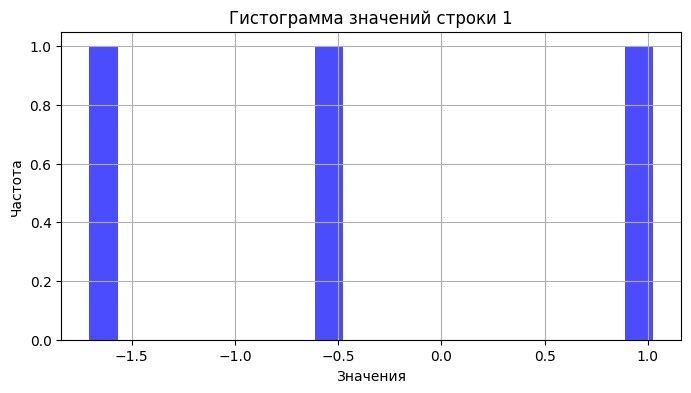

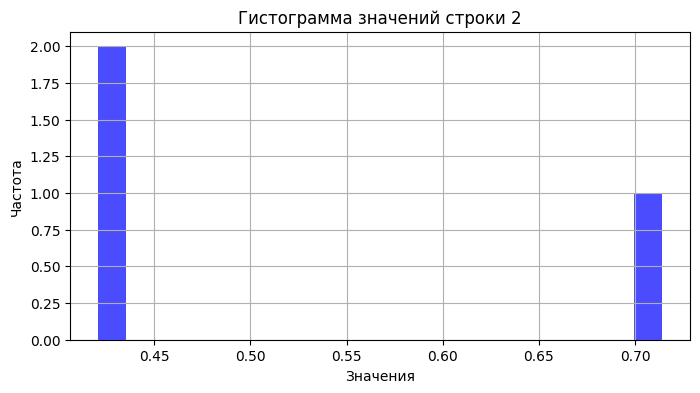

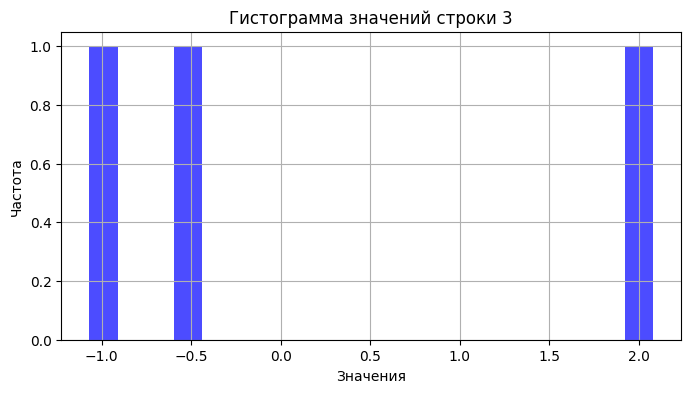

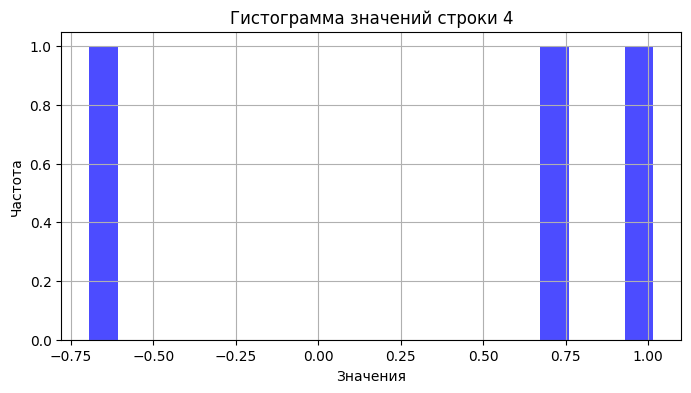

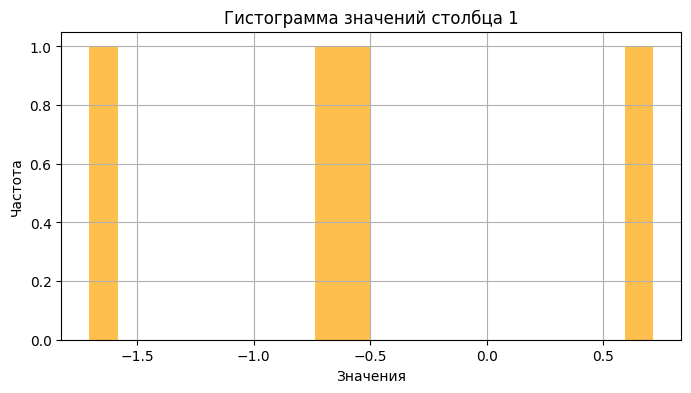

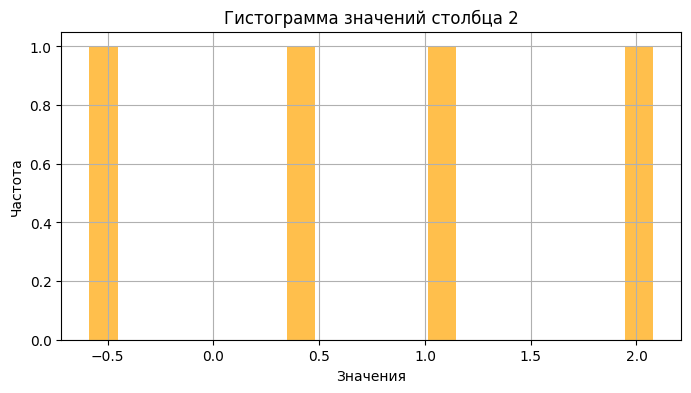

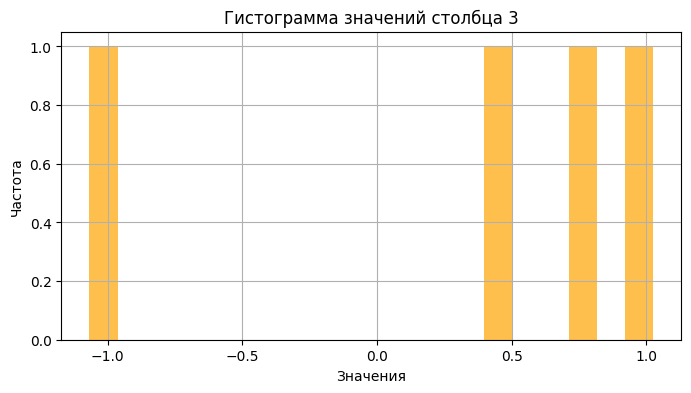

Мат. ожидание для строк: [-0.42204169  0.52147502  0.13965406  0.34619137]
Дисперсия для строк: [1.25561419 0.01852655 1.91764017 0.55516864]
Мат. ожидание для столбцов: [-0.56918164  0.73203721  0.27610349]
Дисперсия для столбцов: [0.73805071 0.93203722 0.64610022]


In [47]:


def generate_matrix_and_stats(m, n):
    # Генерация матрицы (m, n) со случайными числами
    matrix = np.random.normal(loc=0.0, scale=1.0, size=(m, n))
    
    # Вычисление мат. ожидания и дисперсии для строк
    mean_rows = np.mean(matrix, axis=1)
    var_rows = np.var(matrix, axis=1)
    
    # Вычисление мат. ожидания и дисперсии для столбцов
    mean_cols = np.mean(matrix, axis=0)
    var_cols = np.var(matrix, axis=0)
    
    # Построение гистограмм для строк
    for i in range(m):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[i], bins=20, alpha=0.7, color='blue')
        plt.title(f'Гистограмма значений строки {i + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()
    
    # Построение гистограмм для столбцов
    for i in range(n):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[:, i], bins=20, alpha=0.7, color='orange')
        plt.title(f'Гистограмма значений столбца {i + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()
    
    return mean_rows, var_rows, mean_cols, var_cols

# Задаем размеры матрицы
m = 4  
n = 3  

# Генерируем матрицу и считаем статистики
mean_rows, var_rows, mean_cols, var_cols = generate_matrix_and_stats(m, n)

# Выводим результаты
print("Мат. ожидание для строк:", mean_rows)
print("Дисперсия для строк:", var_rows)
print("Мат. ожидание для столбцов:", mean_cols)
print("Дисперсия для столбцов:", var_cols)



<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [48]:
def chess(m, n, a, b):
    # Инициализируем матрицу с нулями
    matrix = np.zeros((m, n), dtype=int)
    
    # Заполняем матрицу в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a  # Черные клетки
            else:
                matrix[i, j] = b  # Белые клетки
    
    return matrix
def run_tests():
    # Тест 1: Базовый случай 2x2
    result1 = chess(2, 2, 1, 0)
    expected1 = np.array([[1, 0], [0, 1]])
    assert np.array_equal(result1, expected1), f"Test 1 Failed: {result1} != {expected1}"
    print("Test 1 Passed")

    # Тест 2: Четная матрица 4x4
    result2 = chess(4, 4, 1, 0)
    expected2 = np.array([[1, 0, 1, 0],
                           [0, 1, 0, 1],
                           [1, 0, 1, 0],
                           [0, 1, 0, 1]])
    assert np.array_equal(result2, expected2), f"Test 2 Failed: {result2} != {expected2}"
    print("Test 2 Passed")

    # Тест 3: Нечетная матрица 3x5
    result3 = chess(3, 5, 1, 0)
    expected3 = np.array([[1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0],
                           [1, 0, 1, 0, 1]])
    assert np.array_equal(result3, expected3), f"Test 3 Failed: {result3} != {expected3}"
    print("Test 3 Passed")

    # Тест 4: Заполнение с разными числами
    result4 = chess(3, 3, 5, 3)
    expected4 = np.array([[5, 3, 5],
                           [3, 5, 3],
                           [5, 3, 5]])
    assert np.array_equal(result4, expected4), f"Test 4 Failed: {result4} != {expected4}"
    print("Test 4 Passed")

    # Тест 5: Заполнение 1x1 матрицы
    result5 = chess(1, 1, 7, 9)
    expected5 = np.array([[7]])
    assert np.array_equal(result5, expected5), f"Test 5 Failed: {result5} != {expected5}"
    print("Test 5 Passed")

# Запуск тестов
run_tests()


Test 1 Passed
Test 2 Passed
Test 3 Passed
Test 4 Passed
Test 5 Passed


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [55]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем изображение с фоном
    image = np.ones((m, n, 3)) * np.array(background_color)
    
    # Определяем координаты прямоугольника
    x_start = (n - a) // 2
    x_end = x_start + a
    y_start = (m - b) // 2
    y_end = y_start + b

    # Заполняем область прямоугольника заданным цветом
    image[y_start:y_end, x_start:x_end] = np.array(rectangle_color)

    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Создаем изображение с фоном
    image = np.ones((m, n, 3)) * np.array(background_color)
    
    # Определяем центр эллипса
    x0, y0 = n // 2, m // 2
    
    # Строим эллипс
    for y in range(m):
        for x in range(n):
            if ((x - x0)**2 / a**2 + (y - y0)**2 / b**2) <= 1:
                image[y, x] = np.array(ellipse_color)

    return image
def run_tests():
  
    rectangle_image = draw_rectangle(4, 2, 10, 10, (1, 0, 0), (1, 1, 1))  
    assert rectangle_image[4:6, 3:7].tolist() == [[list((1, 0, 0))]*4]*2, "Test 1 Failed"
    assert (rectangle_image[0:10, 0:10] == [1, 1, 1]).all() or (rectangle_image[4:6, 3:7] == [1, 0, 0]).all(), "Test 1 Failed"
    print("Test 1 Passed")


    ellipse_image = draw_ellipse(3, 1, 10, 10, (0, 0, 1), (1, 1, 1))  
    assert (ellipse_image[5, 4:7] == [0, 0, 1]).all(), "Test 2 Failed"  
    print("Test 2 Passed")

    ellipse_image_large = draw_ellipse(5, 3, 10, 10, (1, 1, 0), (1, 1, 1))  
    assert (ellipse_image_large[5, 2:8] == [1, 1, 0]).all(), "Test 4 Failed"  
    assert (ellipse_image_large[3, 3:6] == [1, 1, 0]).all(), "Test 4 Failed"  
    assert (ellipse_image_large[7, 3:6] == [1, 1, 0]).all(), "Test 4 Failed"  
    print("Test 3 Passed")

# Запуск тестов
run_tests()




Test 1 Passed
Test 2 Passed
Test 4 Passed


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [60]:
def calculate_statistics(series):

    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    
    return mean, variance, std_dev

def find_local_extrema(series):

    local_maxima = []
    local_minima = []
    
    # Проверяем все точки, кроме первой и последней
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:  # Локальный максимум
            local_maxima.append(series[i])
        elif series[i] < series[i - 1] and series[i] < series[i + 1]:  # Локальный минимум
            local_minima.append(series[i])

    return np.array(local_maxima), np.array(local_minima)

def moving_average(series, p):

    return np.convolve(series, np.ones(p)/p, mode='valid')

# Пример использования функций
def analyze_time_series(series, p):
    mean, variance, std_dev = calculate_statistics(series)
    local_maxima, local_minima = find_local_extrema(series)
    moving_avg = moving_average(series, p)
    
    return {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_average': moving_avg
    }
# Пример временного ряда
time_series = np.array([1, 3, 2, 5, 4, 6, 3, 7, 5, 4, 8, 6, 9, 7, 5])
p = 3

# Анализ временного ряда
result = analyze_time_series(time_series, p)

# Вывод результатов
print("Математическое ожидание:", result['mean'])
print("Дисперсия:", result['variance'])
print("Среднеквадратичное отклонение:", result['std_dev'])
print("Локальные максимумы:", result['local_maxima'])
print("Локальные минимумы:", result['local_minima'])
print("Скользящее среднее:", result['moving_average'])


Математическое ожидание: 5.0
Дисперсия: 4.666666666666667
Среднеквадратичное отклонение: 2.160246899469287
Локальные максимумы: [3 5 6 7 8 9]
Локальные минимумы: [2 4 3 4 6]
Скользящее среднее: [2.         3.33333333 3.66666667 5.         4.33333333 5.33333333
 5.         5.33333333 5.66666667 6.         7.66666667 7.33333333
 7.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [61]:
import numpy as np

def one_hot_encoding(labels):

    # Определяем количество уникальных классов
    num_classes = np.max(labels) + 1  
    # Создаем матрицу zeros размера (количество меток, количество классов)
    one_hot_matrix = np.zeros((len(labels), num_classes), dtype=int)
    
    # Заполняем матрицу единицами в нужных позициях
    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1
        
    return one_hot_matrix

# Пример использования функции
labels = np.array([0, 2, 3, 0])
one_hot_encoded = one_hot_encoding(labels)

print("One-hot encoding:")
print(one_hot_encoded)


One-hot encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
